# <font color=darkblue>**Universidad Nacional Autónoma de México**
# <font color=darkblue>**Facultad de Ciencias, semestre 2023-1**
# <font color=orange>**Práctica 3 de Análisis Numérico**
# Dra. Úrsula Iturrarán Viveros

## **Interpolación**

In [1]:
#Importamos todas las librerias a usar
import numpy as np
from sympy import *
import sympy as sym
import matplotlib.pyplot as plt
from more_itertools import sort_together
from IPython.display import display, Latex
import plotly.graph_objects as go
from math import sqrt
import plotly.io as pio

# **Ejercicio 1**
Dado un conjunto de puntos $S = \lbrace \left( x_i,y_i\right):i=0,1,2...,n \rbrace$, con $x_i\neq x_j$ para todo $i\neq j$; escribe un programa que calcule los coeficientes $a_k$ del polinomio de grado $n$:

$$ P(x) = \overset{n}{\underset{k=0}{\sum}}a_k x^k$$

que pasa por cada punto de $S$. Y después escribe una rutina que pueda evaluar cualquier número real en la función $P(x)$ y que grafique a $P(x)$ en el intervalo $[x_0,x_n]$.

Los puntos ingresados fueron: x-- [-1.  0.  1.] y-- [144.  49.   4.]
La matriz de Vandermonde es:
[[ 1. -1.  1.]
 [ 0.  0.  1.]
 [ 1.  1.  1.]]
El vector de coeficientes es:
[ 25. -70.  49.]
El polinomio de interpolación es: 
25.0*x**2 - 70.0*x + 49.0


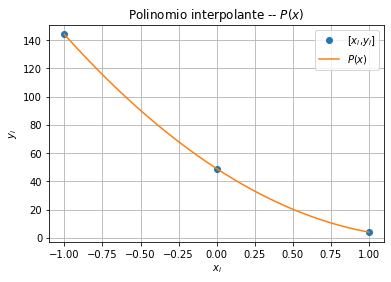

In [3]:
# Sabemos que podemos calcular los coeficientes a_k por el método de la matriz
# de Vandermonde 

# Primero pedimos al usuario ingresar sus coordenadas
puntos = int(input("Ingrese la cantidad de puntos que desea graficar: "))
x = []
y = []

for i in range(puntos):
  xi = float(input("Ingrese el valor de x: "))
  yi = float(input("Ingrese el valor de y: "))
  x.append(xi)
  y.append(yi)

xis = np.array(x)
yis = np.array(y)
print("Los puntos ingresados fueron: x--", xis, "y--", yis)


# Matriz de Vandermore
n = len(xis)
V = np.zeros(shape=(n,n),dtype =float)
for i in range(0,n,1):
  for j in range(0,n,1):
    p = (n-1)-j
    V[i,j] = xis[i]**p
print("La matriz de Vandermonde es:")
print(V)
#print(np.vander(xis)) Para comprobar con numpy

# Solución del sistema Va=y
a = np.linalg.solve(V,yis)
print("El vector de coeficientes es:")
print(a)

# Polinomio
x = sym.Symbol('x')
P = 0
for i in range(0,n,1):
  k = (n-1)-i  
  termino = a[i]*(x**k)
  P = P + termino

print("El polinomio de interpolación es: ")
print(P)

# Graficar P en [x_0, x_n]
px = sym.lambdify(x,P)
a = np.min(xis)
b = np.max(xis)
xin = np.linspace(a,b,101)
yin = px(xin)

plt.plot(xis,yis,'o', label='[$x_i$,$y_i$]')
plt.plot(xin,yin, label='$P(x)$')
plt.xlabel('$x_i$')
plt.ylabel('$y_i$')
plt.legend()
plt.title("Polinomio interpolante -- $P(x)$")
plt.grid(axis='both')
plt.show()

> - <font color=red> Prueba tu programa encontrando el polinomio de grado 2 que pasa por los puntos del conjunto $S=\lbrace (-1,144),(0,49),(1,4)\rbrace$, y el polinomio de grado 3 que pasa por los puntos de $S=\lbrace (-1,143),(0,49),(1,5),(2,17)\rbrace$</font>
> - <font color=red> Escribe los polinomios encontrados en el punto anterior.</font>

La matriz de Vandermonde es:
[[ 1. -1.  1.]
 [ 0.  0.  1.]
 [ 1.  1.  1.]]
El vector de coeficientes es:
[ 25. -70.  49.]
El polinomio de interpolación es: 
25.0*x**2 - 70.0*x + 49.0


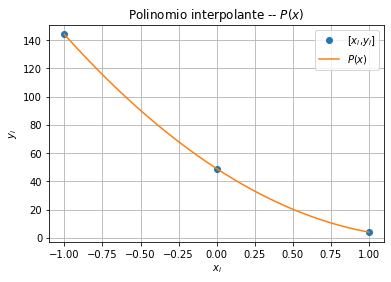

In [ ]:
# Pruebas para S = {(-1,144),(0,49),(1,4)}
# Ingresamos las coordenadas

xi = [-1, 0, 1]
yi = [144, 49, 4]

xis = np.array(xi)
yis = np.array(yi)

# Matriz de Vandermore
n = len(xis)
V = np.zeros(shape=(n,n),dtype =float)
for i in range(0,n,1):
  for j in range(0,n,1):
    p = (n-1)-j
    V[i,j] = xis[i]**p
print("La matriz de Vandermonde es:")
print(V)

# Solución del sistema Va=y
a = np.linalg.solve(V,yis)
print("El vector de coeficientes es:")
print(a)

# Polinomio
x = sym.Symbol('x')
P = 0
for i in range(0,n,1):
  k = (n-1)-i  
  termino = a[i]*(x**k)
  P = P + termino

print("El polinomio de interpolación es: ")
print(P)

# Graficar P en [x_0, x_n]
px = sym.lambdify(x,P)
a = np.min(xis)
b = np.max(xis)
xin = np.linspace(a,b,101)
yin = px(xin)

plt.plot(xis,yis,'o', label='[$x_i$,$y_i$]')
plt.plot(xin,yin, label='$P(x)$')
plt.xlabel('$x_i$')
plt.ylabel('$y_i$')
plt.legend()
plt.title("Polinomio interpolante -- $P(x)$")
plt.grid(axis='both')
plt.show()

La matriz de Vandermonde es:
[[-1.  1. -1.  1.]
 [ 0.  0.  0.  1.]
 [ 1.  1.  1.  1.]
 [ 8.  4.  2.  1.]]
El vector de coeficientes es:
[  1.  25. -70.  49.]
El polinomio de interpolación es: 
1.0*x**3 + 25.0*x**2 - 70.0*x + 49.0


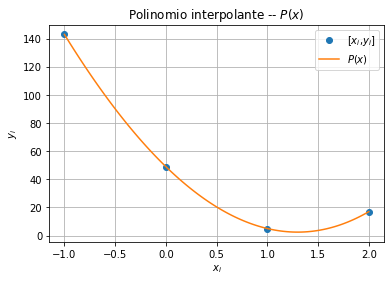

In [ ]:
# Prueba para S = {(-1,143),(0,49),(1,5),(2,17)}
# Ingresamos las coordenadas

xi = [-1, 0, 1, 2]
yi = [143, 49, 5, 17]

xis = np.array(xi)
yis = np.array(yi)

# Matriz de Vandermore
n = len(xis)
V = np.zeros(shape=(n,n),dtype =float)
for i in range(0,n,1):
  for j in range(0,n,1):
    p = (n-1)-j
    V[i,j] = xis[i]**p
print("La matriz de Vandermonde es:")
print(V)
#print(np.vander(xis)) Para comprobar con numpy

# Solución del sistema Va=y
a = np.linalg.solve(V,yis)
print("El vector de coeficientes es:")
print(a)

# Polinomio
x = sym.Symbol('x')
P = 0
for i in range(0,n,1):
  k = (n-1)-i  
  termino = a[i]*(x**k)
  P = P + termino

print("El polinomio de interpolación es: ")
print(P)

# Graficar P en [x_0, x_n]
px = sym.lambdify(x,P)
a = np.min(xis)
b = np.max(xis)
xin = np.linspace(a,b,101)
yin = px(xin)

plt.plot(xis,yis,'o', label='[$x_i$,$y_i$]')
plt.plot(xin,yin, label='$P(x)$')
plt.xlabel('$x_i$')
plt.ylabel('$y_i$')
plt.legend()
plt.title("Polinomio interpolante -- $P(x)$")
plt.grid(axis='both')
plt.show()

Así los polinomios obtenidos fueron:


1.   $25x^2 - 70x + 49$
2.   $x^3 + 25x^2 - 70x + 49$


# **Ejercicio 2**
Escribe un programa que encuentre el polinomio interpolante de Newton para un conjunto de puntos $S = \lbrace \left( x_i,y_i\right):i=0,1,2...,n \rbrace$. Además, este programa debe arrojar un valor $P(x)$ para cualquier valor $x$ introducido y grafica a $P(x)$ en el intervalo $[x_0,x_n]$.

In [4]:
def polNewton(numpuntos):
  #Listas que van a contener los puntos x y
  X = []

  #Creamos la matriz de diferencias divididas
  A = np.zeros((numpuntos, numpuntos))

  #Pedimos los datos al usuario
  for num in range(numpuntos):
    try:
      xi = float(input(f"Ingresa la coordenada x del punto número {num} "))
      yi = float(input(f"Ingresa la coordenada y del punto número {num} "))

      X.append(xi)
      #La primer columna de la matriz A son los elementos del vector Y
      A[num][0] = yi

    except ValueError:
      print("Lo siento, el valor ingresado no es un número")

  #Llenamos la matriz A columna por columna
  for i in range(numpuntos):
    for j in range(1, i + 1):
      numerador = A[i][j - 1] - A[i - 1][ j - 1]
      denominador = X[i] - X[i - j]
      diferencia = numerador/denominador
      A[i][j] = diferencia

  #Construimos el polinomio que interpola
  x = symbols('x')
  init_printing()

  polinomio = A[0][0]

  #Vamos creando los sumandos del polinomio de Newton
  for i in range(1, numpuntos):
    sumando = 1
    for j in range(i):
      sumando = sumando*(x - X[j])

    polinomio += sumando*A[i][i]

  #Titulo de la grafica
  latexpol =f'$P(x) = {latex(polinomio)}$'
  print("***Polinomio\n")
  display(Latex(latexpol))

  print("***Polinomio simplificado\n")
  display(Latex(latex(expand(polinomio))))

  #Graficamos
  xgraf = np.linspace(min(X), max(X), 100)
  ygraf = [float(polinomio.subs(x, xi)) for xi in xgraf]

  fig = go.Figure()

  fig.add_trace(
      go.Scatter(x = xgraf, y = ygraf, mode = 'lines',
                 marker=dict(color="LightSeaGreen"), name = 'P(x)')
      )

  fig.add_trace(
      go.Scatter(x = X, y = A[:, 0], mode = 'markers',
                 marker=dict(size=10, color="MediumPurple"), name = 'Puntos dados')
      )
  fig.update_layout(title_text="Polinomio de Newton",
                  title_font_size=30, width=1400, height=700)
  fig.show(renderer = 'svg')

  #Preguntamos al usuario si quiere evaluar el polinomio
  evaluar = True
  while evaluar:
    print('¿Quieres evaluar el polinomio P(x)?')
    print('***1.- Sí')
    print('***2.- No')

    seleccion = int(input('\n Ingresa el número deseado\n'))
    
    if seleccion == 1:
      valorx = float(input('Ingresa el valor de x\n'))
      print(f'*****P({x}) = {polinomio.subs(x, valorx)}')
    
    if seleccion == 2:
      break

> - <font color=red>Dados los siguientes valores de una función:
$$\quad x = \; 0.0 \quad 1.0 \quad 2.0 \quad 3.0 \quad 4.0 \quad 5.0 $$
$$f(x) = -7 \:\: -4 \quad 5.0 \quad 26 \:\:\quad 65 \quad 128 $$
Calcula mediante el programa anterior el polinomio que interpola los datos.</font>

> - <font color=red> ¿Cuál es el grado del polinomio anterior y el coeficiente de la más alta potencia de $x$?
</font>

El grado del polinomio es tres y el coeficiente de la más alta potencia es 1


***Polinomio



<IPython.core.display.Latex object>

***Polinomio simplificado



<IPython.core.display.Latex object>

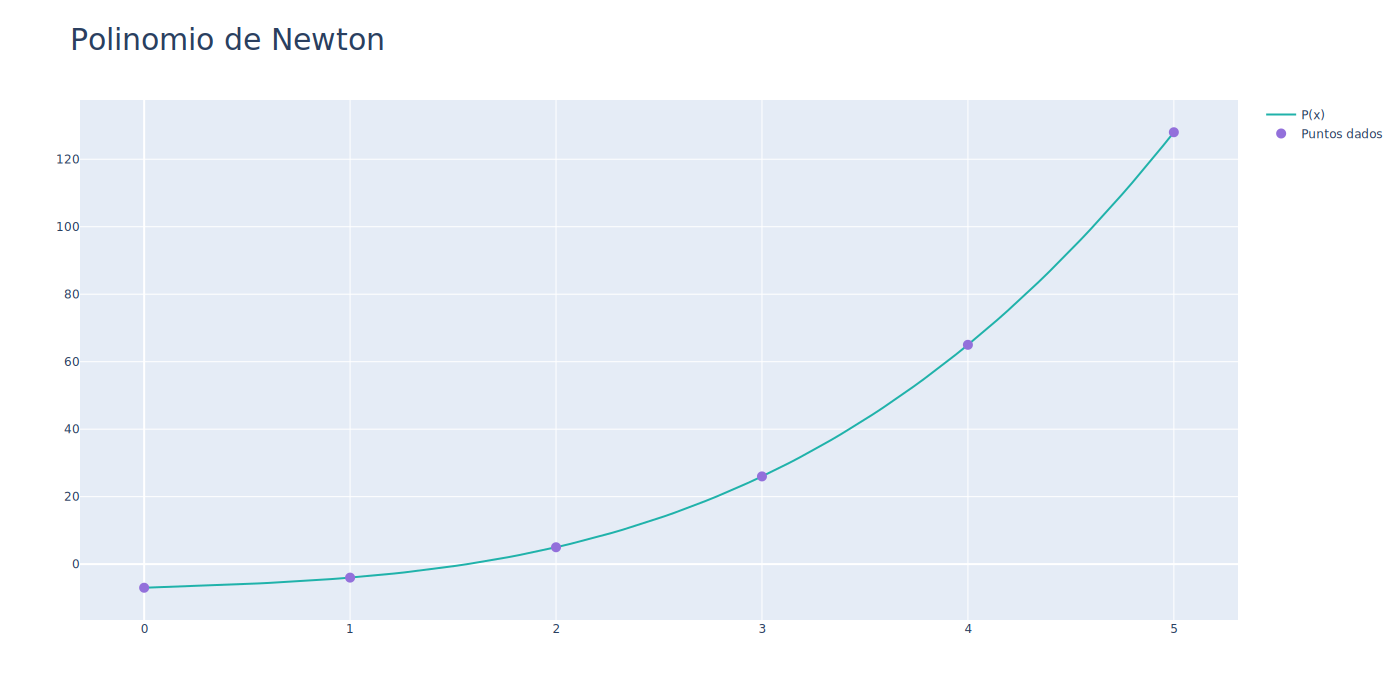

¿Quieres evaluar el polinomio P(x)?
***1.- Sí
***2.- No


In [6]:
polNewton(6)

# **Ejercicio 3**
Escribe un programa que encuentre el polinomio interpolante de Lagrange para un conjunto de puntos $S = \lbrace \left( x_i,y_i\right):i=0,1,2...,n \rbrace$. Además, este programa debe devolver un valor $P(x)$ para cualquier valor $x$ introducido y graficar a $P(x)$ en el intervalo $[x_0,x_n]$.

In [7]:
def polLagrange(numpuntos):
  n = numpuntos

  #Listas que van a contener los puntos x y
  X = []
  Y = []
  #Pedimos los datos al usuario
  for num in range(numpuntos):
    try:
      xi = float(input(f"Ingresa la coordenada x del punto número {num} "))
      yi = float(input(f"Ingresa la coordenada y del punto número {num} "))

      X.append(xi)
      Y.append(yi)
    except ValueError:
      print("Lo siento, el valor ingresado no es un número")

  #Construimos los multiplicadores
  list_multi = []
  
  #Creamos el simbolo x
  x = symbols('x')
  for i in range(n):
    multi = 1
    for j in range(n):
      if i != j:
        multi = multi * ((x - X[j])/(X[i] - X[j]))

      #Lo agragamos a la lista
    list_multi.append(multi)

  #Creamos el polinomio
  polinomio = 0
  for i in range(n):
    polinomio += Y[i]*list_multi[i]

  #Titulo de la grafica
  latexpol =f'$P(x) = {latex(polinomio)}$'
  print("***Polinomio\n")
  display(Latex(latexpol))

  #Graficamos
  xgraf = np.linspace(min(X), max(X), 30)
  ygraf = [float(polinomio.subs(x, xi)) for xi in xgraf]

  fig = go.Figure()

  fig.add_trace(
      go.Scatter(x = xgraf, y = ygraf, mode = 'lines',
                 marker=dict(color="LightSeaGreen"), name = 'P(x)')
      )

  fig.add_trace(
      go.Scatter(x = X, y = Y, mode = 'markers',
                 marker=dict(size=10, color="MediumPurple"), name = 'Puntos dados')
      )
  fig.update_layout(title_text="Polinomio de Lagrange",
                  title_font_size=30, width=1400, height=700)
  fig.show(renderer = 'svg') 
  
  #Preguntamos al usuario si quiere evaluar el polinomio
  evaluar = True
  while evaluar:
    print('¿Quieres evaluar el polinomio P(x)?')
    print('***1.- Sí')
    print('***2.- No')

    seleccion = int(input('\n Ingresa el número deseado\n'))
    
    if seleccion == 1:
      valorx = float(input('Ingresa el valor de x\n'))
      print(f'*****P({x}) = {polinomio.subs(x, valorx)}')
    
    if seleccion == 2:
      break

> - <font color=red>La presión de vapor del agua (en unidades $[bar]$) como función de la temperatura $T(°C)$ es:
$$T =\quad 0 \qquad 10 \qquad 20 \qquad 30 \qquad 40 \qquad 60 \qquad 80 \qquad 100$$
$$P = 0.0061 \:\: 0.0123 \:\: 0.0234 \:\: 0.0424 \:\: 0.0738 \:\: 0.1992 \:\: 0.4736 \:\: 1.0133 $$
Calcula mediante el programa anterior el polinomio que interpola los datos.</font>

***Polinomio



<IPython.core.display.Latex object>

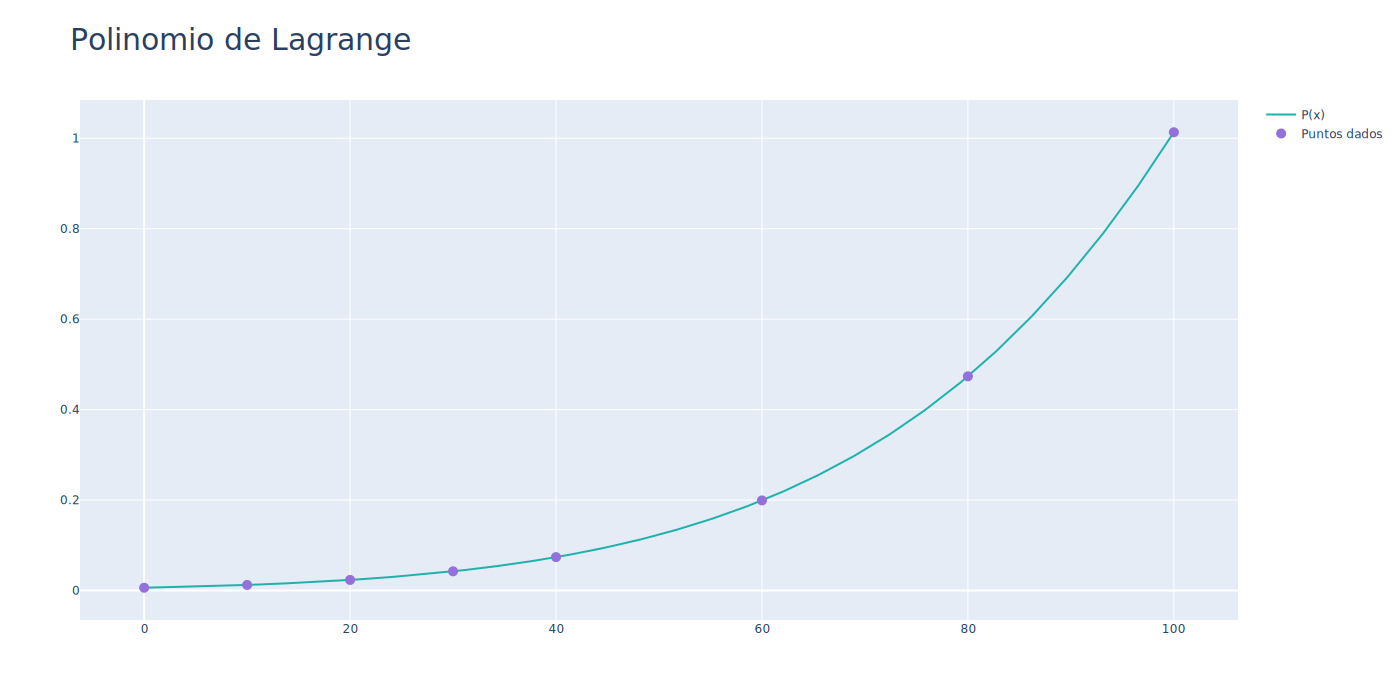

¿Quieres evaluar el polinomio P(x)?
***1.- Sí
***2.- No


In [8]:
polLagrange(8)

> - <font color=red> Por medio del polinomio encontrado estima el valor de $P(5)$, $P(45)$ y $P(95)$
</font>

> - <font color=red> Compara tus resultados con los valores conocidos de la presión: $P(5) = 0.008721$, $P(45) = 0.095848$ y $P(95) = 0.84528$. Calcula el error absoluto de los valores otenidos a través del polinomio interpolante. ¿El polinomio interpolante describe bien la presión de vapor como función de la temperatura?
</font>

Los valores estimados son:
$$P(5) = 0.00869104207356771$$
$$P(45) = 0.0959185974121094$$
$$P(95) = 0.846172792561851$$

El polinomio interpolantes sí describe bien la presión de vapor como función de la temperatura, pero si quisieramos un método que nos proporcione valores exactos, entonces el polinomio interpolante no es una buena opción debido a solo aproxima a uno o dos decimales

# **Ejercicio 4**
Escribe un programa que calcule un spline cuadratico $Q(x)$ que interpole un conjunto de datos $S = \lbrace \left( x_i,y_i\right):i=1,2...,n \rbrace$. Además, este programa debe devolver un valor $Q(x)$ para cualquier valor $x$ introducido y graficar $Q(x)$ en el intervalo $[x_0,x_n]$.

# Nota
Al hacer el sistema de ecuaciones para encontar los valores de los coeficientes de los polinomios cúbicos, vamos a obtener un sistema con $n$ ecuaciones y $n + 1$ incógnitas, por lo que vamos a hacer que el polinomio del intervalo $[x_1, x_2]$ sea de grado uno, es decir, una recta.


Sea $i \in [1, \ldots, n]$.

Las primeras $2(n-1)$ ecuaciones surgen de que el polimnomio que extrapola,$P$, debe cumplir que $P(x_i) = y_i$, por lo que las ecuaciones van a ser del estilo:

$$a_jx_i^2 + b_jx_i + c_j = f(x_i)$$
$$a_jx_i^2 + b_jx_i + c_j = f(x_i)$$
Para $j \in [1, \ldots, n-1]$

Luego, el resto de las ecuaciones van a surgir del hecho de que la primer derivada del polinomio $P$ tiene que ser continua. Así, si $i \in [2, \ldots, n]$, el resto de las ecuaciones es:
$$2a_ix_i - 2a_{i+1}x_{i+1} + b_i - b_{i+1} = 0$$

In [9]:
def spline2(numpuntos):
  n = numpuntos
  #tamaño de la matriz
  nmatriz = 3*(n-1) -1

  #Creamos una matriz de (n-1)x(n-1)
  A = np.zeros((nmatriz, nmatriz))

  #Listas que van a contener los puntos x y
  X = []
  Y = []
  #Pedimos los datos al usuario
  for num in range(numpuntos):
    try:
      xi = float(input(f"Ingresa la coordenada x del punto número {num} "))
      yi = float(input(f"Ingresa la coordenada y del punto número {num} "))

      X.append(xi)
      Y.append(yi)
    except ValueError:
      print("Lo siento, el valor ingresado no es un número")
  
  #Ordenamos ambas listas
  Y = list(sort_together([X, Y])[1])
  X.sort()

  #Llenamos los primeros dos renlones de la matriz

  A[0][0] = X[0]
  A[0][1] = 1
  A[1][0] = X[1]
  A[1][1] = 1

  #Tambien llenamos el renglon 2(n-1) + 1
  A[2*(n-1)][0] = 1
  A[2*(n-1)][2] = -2*X[1]
  A[2*(n-1)][3] =  -1 
  #Iterador para las ecuaciones
  for i in range(2, 2*(n-1), 2):
    #LLenamos la matriz
    for k in range(2):
      j = i + k
      indicex = int(i/2 + k)

      #Las primeras dos ecuaciones son diferentes
      if i == 2:
        columna = 2
      else:
        columna = int(3*i/2 - 1)
      

      A[j][columna] = X[indicex]**2
      A[j][columna + 1] = X[indicex]
      A[j][columna + 2] = 1

  #Ahora llenamos con el resto de ecuaciones:
  for i in range(2*(n-1) + 1, nmatriz):
    columna = i - 2*(n-2) - 1

    A[i][columna] = 2*X[columna]
    A[i][columna + 1] = 1
    A[i][columna + 3] = -2*X[columna]
    A[i][columna + 4] = -1


  #Creamos el vector b
  b = np.zeros((nmatriz, 1))
  b[0][0] = Y[0]
  b[2*(n-1) - 1][0] = Y[-1]

  for i in range(1, n - 1):
    b[i*2 - 1][0] = Y[i]
    b[i*2][0] = Y[i]
  # print(A)
  # print(b)

  #Resolvemos el sistema 
  coef = np.linalg.solve(A, b)
  
  #Creamos el eje x para graficar el polinomio
  z = np.linspace(X[0], X[1], 10)
  y = coef[0]*z + coef[1]
  for i in range(1, n-1):
    zi = np.linspace(X[i], X[i+1], 10)
    z = np.concatenate((z, zi), axis = 0)

    #evaluamos el vector z
    indicey = 3*(i-1) + 2
    yi = coef[indicey]*zi**2 + coef[indicey + 1]*zi + coef[indicey + 2]
    y = np.concatenate((y, yi), axis = 0)

  #Graficamos
  fig = go.Figure()

  fig.add_trace(
      go.Scatter(x = z, y = y, mode = 'lines',
                 marker=dict(color="LightSeaGreen"), name = 'Q(x)')
      )

  fig.add_trace(
      go.Scatter(x = X, y = Y, mode = 'markers',
                 marker=dict(size=10, color="MediumPurple"), name = 'Puntos dados')
      )
  fig.update_layout(title_text="Spline cuadrático",
                  title_font_size=30, width=1400, height=700)
  fig.show(renderer = 'svg')
  
  #Preguntamos al usuario si quiere evaluar el polinomio
  evaluar = True
  while evaluar:
    print('¿Quieres evaluar el polinomio P(x)?')
    print('***1.- Sí')
    print('***2.- No')

    seleccion = int(input('\n Ingresa el número deseado\n'))
    
    if seleccion == 1:
      valorx = float(input('Ingresa el valor de x\n'))
      
      #Verificamos que el valor este en el dominio
      intervalo = -1
      if valorx < X[0] or valorx > X[-1]:
        print('El valor ingresado no está dentro de la definicion del splin')
      else:
        for i in range(n-1):
          if X[i] <= valorx <= X[i+1]:
            intervalo = i

        if intervalo == 0:
          evaluacion = coef[0]*valorx + coef[1]
          print(f'Q({valorx}) = {evaluacion[0]}')
        else:
          indice = i*3 - 1
          evaluacion = coef[indice]*valorx**2 + coef[indice + 1]*valorx + coef[indice + 2]
          print(f'Q({valorx}) = {evaluacion[0]}')

    if seleccion == 2:
      break


> - <font color=red>Dados los siguientes valores de una función:
$$\quad x = \; -1 \;\quad 0 \quad 1 \quad 2$$
$$p(x) = -4 \:\: -1 \quad 2 \quad 23 $$
Calcula mediante el programa anterior el spline cuadratico $Q(x)$ que interpola los datos y también calcula $Q(1.5)$.</font>

El resultado obtenido es que $Q(1.5) = 8$

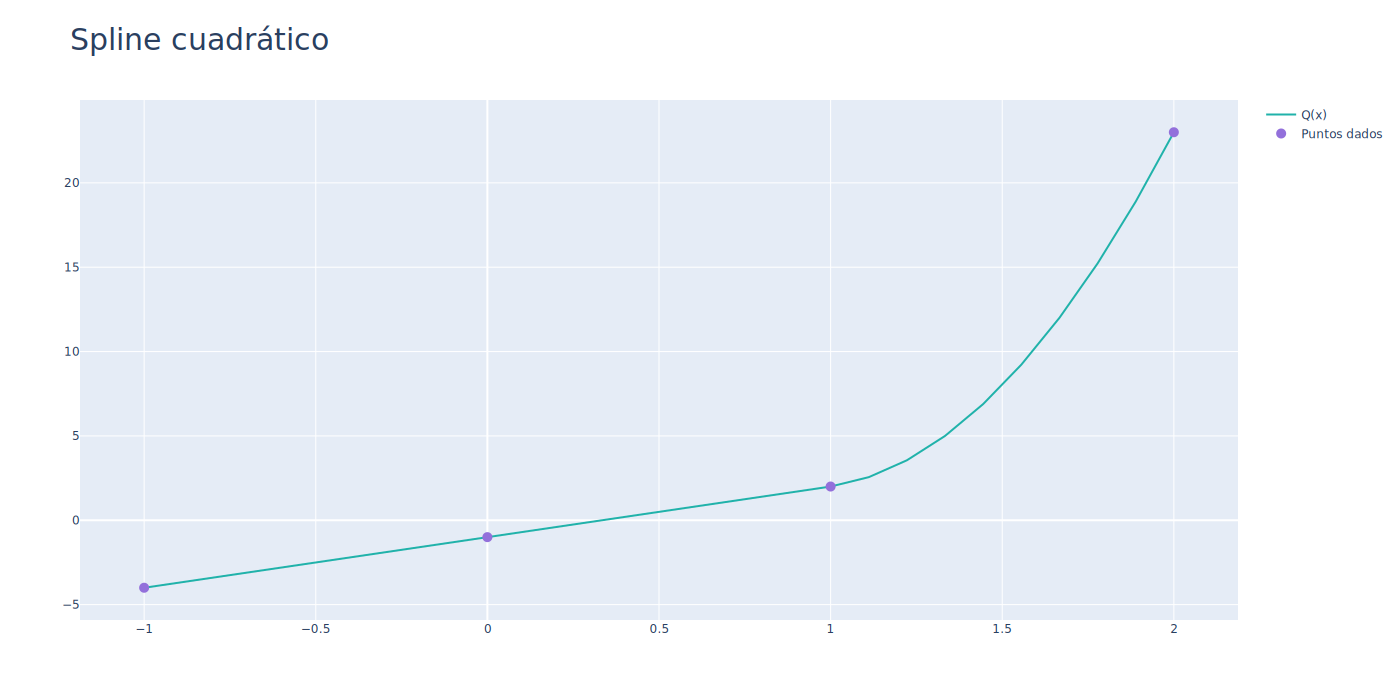

¿Quieres evaluar el polinomio P(x)?
***1.- Sí
***2.- No


In [10]:
spline2(4)

# **Ejercicio 5**
En un experimento se produjeron los siguientes datos:

$$t = 0.0 \quad 0.5 \quad 1.0 \quad 6.0 \quad 7.0 \quad 9.0 $$
$$y = 0.0 \quad 1.6 \quad 2.0 \quad 2.0 \quad 1.5 \quad 0.0 $$

Se desea interpolar los datos con una curva suave con la esperanza de obtener valores razonables de $y$ para valores de $t$ entre los puntos en los que se hicieron las medidas

a) Escribe un programa que utilice el método de tu preferencia para determinar el polinomio de grado cinco que interpole los datos y que grafique en el rango $0\leq t \leq 9$.

b) Haz un programa que determine un spline cúbico natural que interpole los datos dados y que grafique en el intervalo $0\leq t \leq 9$.

El polinomio de interpolación de grado 5 es: 
0.00568777627601149*x**5 - 0.134787108316519*x**4 + 1.12075734722793*x**3 - 3.85592316180551*x**2 + 4.86426514661809*x


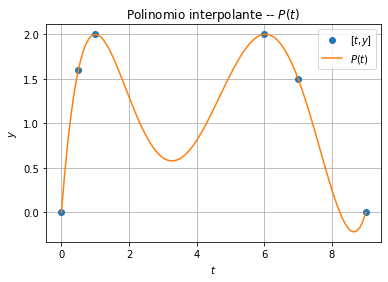

In [ ]:
# a) Usemos el ejercicio 1

# Prueba para S = {(0,0),(0.5,1.6),(1,2),(6,2),(7,1.5),(9,0)}
# Ingresamos las coordenadas

xi = [0,0.5,1,6,7,9]
yi = [0,1.6,2,2,1.5,0]

xis = np.array(xi)
yis = np.array(yi)

n = len(xis)
V = np.zeros(shape=(n,n),dtype =float)
for i in range(0,n,1):
  for j in range(0,n,1):
    p = (n-1)-j
    V[i,j] = xis[i]**p

a = np.linalg.solve(V,yis)

# Polinomio
x = sym.Symbol('x')
P = 0
for i in range(0,n,1):
  k = (n-1)-i  
  termino = a[i]*(x**k)
  P = P + termino

print("El polinomio de interpolación de grado 5 es: ")
print(P)

# Graficar P en [0,9]
px = sym.lambdify(x,P)
a = np.min(xis)
b = np.max(xis)
xin = np.linspace(a,b,101)
yin = px(xin)

plt.plot(xis,yis,'o', label='[$t$,$y$]')
plt.plot(xin,yin, label='$P(t)$')
plt.xlabel('$t$')
plt.ylabel('$y$')
plt.legend()
plt.title("Polinomio interpolante -- $P(t)$")
plt.grid(axis='both')
plt.show()

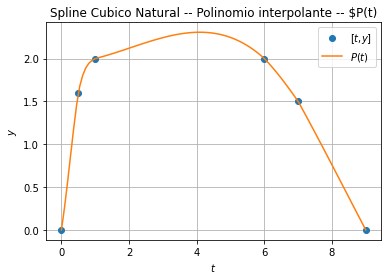

In [ ]:
t =  [0.0,0.5,1.0,6.0,7.0,9.0]
y = [0.0,1.6,2.0,2.0,1.5,0.0]

def SplineCubicoNatural(x0, t, y):
    t = np.asfarray(t)
    y = np.asfarray(y)

    # Ordenamos el vector t ascendentemente 
    if np.any(np.diff(t) < 0):
        indexes = np.argsort(t)
        t = t[indexes]
        # Ordenamos tambien el vector y con el mismo orden que t
        y = y[indexes]

    # Tamaño
    n = len(t)

    # Obtenemos las diferencias de cada vector
    dt = np.diff(t)
    dy = np.diff(y)

    #Creamos arreglos
    L = np.empty(n)
    L1 = np.empty(n-1)
    z = np.empty(n)

    # Diagonales
    L[0] = sqrt(2*dt[0])
    L1[0] = 0.0
    B0 = 0.0
    z[0] = B0/L[0]

    for i in range(1, n-1, 1):
        L1[i] = dt[i-1] / L[i-1]
        L[i] = sqrt(2*(dt[i-1]+dt[i]) - L1[i-1]*L1[i-1])
        Bi = 6*(dy[i]/dt[i] - dy[i-1]/dt[i-1])
        z[i] = (Bi - L1[i-1]*z[i-1])/L[i]

    i = n - 1
    L1[i-1] = dt[-1] / L[i-1]
    L[i] = sqrt(2*dt[-1] - L1[i-1] * L1[i-1])
    Bi = 0.0 
    z[i] = (Bi - L1[i-1]*z[i-1])/L[i]
 
    # Se resuelve el sistema
    i = n-1
    z[i] = z[i] / L[i]
    for i in range(n-2, -1, -1):
        z[i] = (z[i] - L1[i-1]*z[i+1])/L[i]

    index = t.searchsorted(x0)
    np.clip(index, 1, n-1, index)

    xi1, xi0 = t[index], t[index-1]
    yi1, yi0 = y[index], y[index-1]
    zi1, zi0 = z[index], z[index-1]
    hi1 = xi1 - xi0

    # Polinomio
    f0 = zi0/(6*hi1)*(xi1-x0)**3 + zi1/(6*hi1)*(x0-xi0)**3 +  (yi1/hi1 - zi1*hi1/6)*(x0-xi0) + (yi0/hi1 - zi0*hi1/6)*(xi1-x0)
    return f0


# Graficar P en [0,9]
plt.plot(t, y,'o',label='[$t$,$y$]')
tin = np.linspace(0, 9, 101)
plt.plot(tin, SplineCubicoNatural(tin, t, y),label='$P(t)$')
plt.xlabel('$t$')
plt.ylabel('$y$')
plt.grid(axis='both')
plt.title('Spline Cubico Natural -- Polinomio interpolante -- $P(t)')
plt.legend()
plt.show()

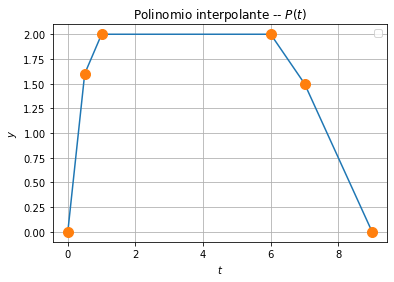

In [ ]:
# Comprobamos con el método que usa SciPy para interpolar 

from scipy.interpolate import CubicSpline
T = [0, 0.5, 1, 6, 7, 9]
Y = [0, 1.6, 2, 2, 1.5, 0]
cs1 = CubicSpline(T,Y,bc_type='natural')
T1 = T
Y1 = cs1(T1)
plt.plot(T1,Y1,T,Y,'o',markersize=10)
plt.xlabel('$t$')
plt.ylabel('$y$')
plt.legend()
plt.title("Polinomio interpolante -- $P(t)$")
plt.grid(axis='both')
plt.show()